<center> 
<h1>Assignement CS809</h1>
</center>
<center><h3>PCA/SVD on a sample dataset </h3></center>
Take any dataset (after reading their descriptions, make sure it has multiple variables) from 
<a href="https://www2.stetson.edu/~jrasp/data.htm ">Dr. John Rasp Statistic website </a> </br>
<br>a) Find the Covariance matrix and Correlation matrix of this data matrix </br>
<br>b) Perform PCA/SVD, choose appropriate number(justify by a scree plot) of dimensions/principal components/singular values and find the new data matrix in terms of these dimensions.</br>
<br>c)Plot the scatter plot of this data along the first two dimensions (or three if it is possible)</br>



In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d 

<h4> Dataset: Poverty Statistics</h4>
Data for 97 countries, on birth and death rates, infant mortality rates, life expectancies, and per capita GDP. Obtained from the Journal of Statistics Education online data archive. Original source was 1990 United Nations data.

### Covariance and Correlation matrix

In [2]:
# Changing working directory
os.chdir('E:\Vikash\stats')

In [3]:
# reading data

df = pd.read_excel('E:\Vikash\stats\Poverty.xls')
df

,BirthRt,DeathRt,InfMort,LExpM,LExpF,GNP,Region,Country
0,24.7,5.7,30.8,69.6,75.5,600,1,Albania
1,12.5,11.9,14.4,68.3,74.7,2250,1,Bulgaria
2,13.4,11.7,11.3,71.8,77.7,2980,1,Czechoslovakia
3,12.0,12.4,7.6,69.8,75.9,*,1,Former_E._Germany
4,11.6,13.4,14.8,65.4,73.8,2780,1,Hungary
...,...,...,...,...,...,...,...,...
92,52.2,15.6,103.0,49.9,52.7,220,6,Uganda
93,50.5,14.0,106.0,51.3,54.7,110,6,Tanzania
94,45.6,14.2,83.0,50.3,53.7,220,6,Zaire
95,51.1,13.7,80.0,50.4,52.5,420,6,Zambia


In [92]:
# Deleting unnecessary column 
df1 = df.drop(['GNP', 'Country'], axis = 1)
df1.head()

,BirthRt,DeathRt,InfMort,LExpM,LExpF,Region
0,24.7,5.7,30.8,69.6,75.5,1
1,12.5,11.9,14.4,68.3,74.7,1
2,13.4,11.7,11.3,71.8,77.7,1
3,12.0,12.4,7.6,69.8,75.9,1
4,11.6,13.4,14.8,65.4,73.8,1


In [99]:
#splitting dataset

x = df1.iloc[:,0:5].values
y = df1.iloc[:,5].values


In [102]:
# Standardize the Data

x1 = StandardScaler().fit_transform(x)
x1.shape

(97, 5)

In [104]:
# Covariance matrix
covMatrix = np.cov(x1.T)
covMatrix


array([[ 1.01041667,  0.4912611 ,  0.8672946 , -0.87554517, -0.90373083],
       [ 0.4912611 ,  1.01041667,  0.66144222, -0.74110688, -0.7002522 ],
       [ 0.8672946 ,  0.66144222,  1.01041667, -0.94659717, -0.96530323],
       [-0.87554517, -0.74110688, -0.94659717,  1.01041667,  0.9927928 ],
       [-0.90373083, -0.7002522 , -0.96530323,  0.9927928 ,  1.01041667]])

In [105]:
# Correlation matrix
corMatrix = np.corrcoef(x1.T)
corMatrix

array([[ 1.        ,  0.48619655,  0.85835342, -0.86651894, -0.89441402],
       [ 0.48619655,  1.        ,  0.65462322, -0.73346661, -0.69303311],
       [ 0.85835342,  0.65462322,  1.        , -0.93683844, -0.95535165],
       [-0.86651894, -0.73346661, -0.93683844,  1.        ,  0.98255782],
       [-0.89441402, -0.69303311, -0.95535165,  0.98255782,  1.        ]])

### Eigen Value

In [112]:
eig_vals,eig_vecs = np.linalg.eig(covMatrix) 
eig_vals

array([4.30265372, 0.55521092, 0.12186729, 0.05886074, 0.01349066])

### Explained Variance
<p> Explained variance helps us to choose number of required component. </p>

In [113]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)


In [114]:
#finding variance explained
total = sum(eig_vals)
var_exp = [(i / total)*100 for i in sorted(eig_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

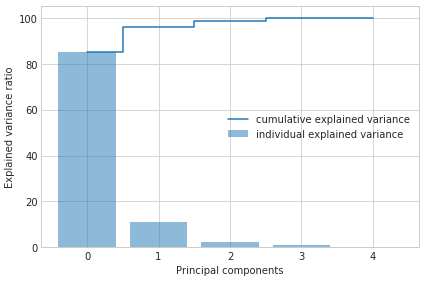

In [117]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(5), var_exp, alpha=0.5, align='center', label='individual explained variance')
    plt.step(range(5), cum_var_exp, where='mid', label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

The plot above clearly shows that most of the variance (84% of the variance to be precise) can be explained by the first principal component alone.

<h6>The original data has 5 columns (BirthRt, DeathRt, InfMort, LExpM, LExpF). In this section, the code projects the original data which is 5 dimensional into 1 dimensions.</h6>

In [122]:
pca = PCA(n_components=1)
pc_comp = pca.fit_transform(x)
pc_df = pd.DataFrame(data = pc_comp
             , columns = ['PC1'])


Text(0, 0.5, 'PC1')

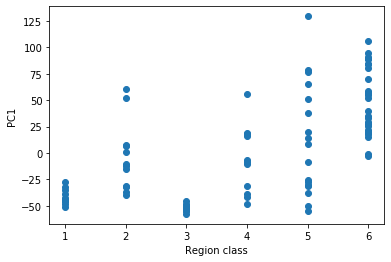

In [125]:
plt.scatter(y,pc_df['PC1'])
plt.xlabel('Region class')
plt.ylabel('PC1')

<h6>The original data has 5 columns (BirthRt, DeathRt, InfMort, LExpM, LExpF). In this section, the code projects the original data which is 5 dimensional into 2 dimensions.</h6>

In [126]:
pca = PCA(n_components=2)
pc_comp = pca.fit_transform(x)
pc_df = pd.DataFrame(data = pc_comp
             , columns = ['PC1','PC2'])

In [127]:
x1 = pc_df['PC1']
x2 = pc_df['PC2']

Text(0, 0.5, 'PC2')

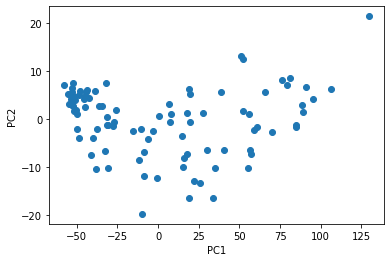

In [128]:
plt.scatter(x1,x2)
plt.xlabel('PC1')
plt.ylabel('PC2')

<h6>The original data has 5 columns (BirthRt, DeathRt, InfMort, LExpM, LExpF). In this section, the code projects the original data which is 5 dimensional into 3 dimensions.</h6>

In [129]:
pca = PCA(n_components=3)
pc_comp = pca.fit_transform(x)
pc_df = pd.DataFrame(data = pc_comp
             , columns = ['PC1','PC2','PC3'])

In [131]:
x1 = pc_df['PC1']
x2 = pc_df['PC2']
x3 = pc_df['PC3']

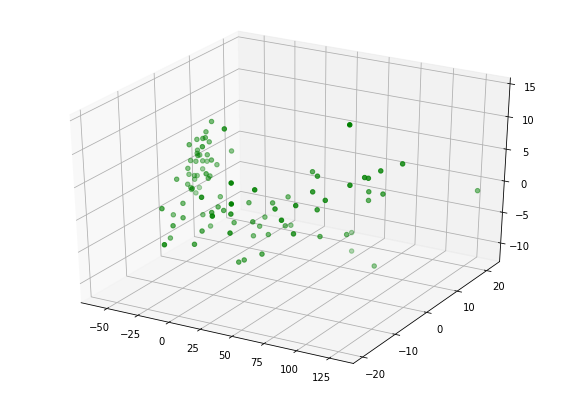

In [132]:
# Creating figure 
fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d") 
  
# Creating plot 
ax.scatter3D(x1, x2, x3, color = "green"); 
plt.show()